# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

My Analysis:
    There appear to be significantly fewer cities at southern latitudes between -60 to -80 than there are in the band of 60 to 80 degrees latitude in the northern hemisphere. This is indicative of a lack of arable land in the southern hemisphere below -60 degrees latitude.
    The percent cloudiness seems to sit in bands regardless of percent. This indicates either a series of natural cloudiness percentages that tend to occur, or a bias with measuring devices that reads to those values.
    There seems to be a slight decrease in average wind speed around the equator. There also seems to be a large increase in average percent humidity around the equator. These might be connected.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
while (len(cities) < 500):
    cities = []
    # Create a set of random lat and lng combinations
    lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
    lat_lngs = zip(lats, lngs)

    # Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

        # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print("Beginning Data Retrieval\n-----------------------------")
sets = round(len(cities)/60+.5)
cityD = {"City":1,"Cloudiness":2,"Country":3,"Date":4,"Humidity":5,"Lat":6,"Lng":7,"Max Temp":8,"Wind Speed":9}
cityDList = []
units = "imperial"
for i in range(1,sets+1):
    start = (i-1)*60
    if (len(cities)-start) > 60:
        for j in range(start,(start+60)):
            try:
                received = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={cities[j]}&units={units}&appid={api_key}").json()
                cityD["City"] = cities[j]
                cityD["Cloudiness"] = received["clouds"]["all"]
                cityD["Country"] = received["sys"]["country"]
                cityD["Date"] = time.time()
                cityD["Humidity"] = received["main"]["humidity"]
                cityD["Lat"] = received["coord"]["lat"]
                cityD["Lng"] = received["coord"]["lon"]
                cityD["Max Temp"] = received["main"]["temp_max"]
                cityD["Wind Speed"] = received["wind"]["speed"]
                cityDList.append(cityD.copy())
                print(f"Processing Record {(j-start)} of Set {i} | {cities[j]}")
            except:
                print("City not found. Skipping...")
    else:
        for j in range(start,len(cities)):
            try:
                received = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={cities[j]}&units={units}&appid={api_key}").json()
                cityD["City"] = cities[j]
                cityD["Cloudiness"] = received["clouds"]["all"]
                cityD["Country"] = received["sys"]["country"]
                cityD["Date"] = time.time()
                cityD["Humidity"] = received["main"]["humidity"]
                cityD["Lat"] = received["coord"]["lat"]
                cityD["Lng"] = received["coord"]["lon"]
                cityD["Max Temp"] = received["main"]["temp_max"]
                cityD["Wind Speed"] = received["wind"]["speed"]
                cityDList.append(cityD.copy())
                print(f"Processing Record {(j-start)} of Set {i} | {cities[j]}")
            except:
                print("City not found. Skipping...")
    

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | camopi
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | antalaha
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | meulaboh
City not found. Skipping...
City not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | chateau-thierry
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | khasan
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | namibe
City not found. Skipping...
Processing Record 16 of Set 1 | tabuny
Processing Record 17 of Set 1 | constitucion
City not found. Skipping...
Processing Record 19 of Set 1 | okhotsk
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | hervey bay
Processing Record 22 of Set 1 | truckee
Processing Record 23 of Set 1 | kavieng
Processing Rec

Processing Record 25 of Set 4 | isangel
Processing Record 26 of Set 4 | carutapera
Processing Record 27 of Set 4 | itarema
Processing Record 28 of Set 4 | port hedland
Processing Record 29 of Set 4 | kuusamo
Processing Record 30 of Set 4 | mizdah
Processing Record 31 of Set 4 | killam
Processing Record 32 of Set 4 | imbituba
City not found. Skipping...
Processing Record 34 of Set 4 | bay roberts
Processing Record 35 of Set 4 | half moon bay
Processing Record 36 of Set 4 | visnes
Processing Record 37 of Set 4 | huadian
Processing Record 38 of Set 4 | guerrero negro
City not found. Skipping...
Processing Record 40 of Set 4 | dehloran
Processing Record 41 of Set 4 | vagay
Processing Record 42 of Set 4 | kapaa
Processing Record 43 of Set 4 | quatre cocos
Processing Record 44 of Set 4 | mudu
Processing Record 45 of Set 4 | marzuq
Processing Record 46 of Set 4 | mikuni
Processing Record 47 of Set 4 | butaritari
Processing Record 48 of Set 4 | saint-francois
Processing Record 49 of Set 4 | po

Processing Record 52 of Set 7 | valparaiso
Processing Record 53 of Set 7 | yulara
Processing Record 54 of Set 7 | tarko-sale
Processing Record 55 of Set 7 | adrar
Processing Record 56 of Set 7 | lavrentiya
Processing Record 57 of Set 7 | ust-kuyga
Processing Record 58 of Set 7 | alta floresta
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 8 | kenai
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of Set 8 | bolshoye selo
City not found. Skipping...
Processing Record 6 of Set 8 | batagay-alyta
Processing Record 7 of Set 8 | seoul
Processing Record 8 of Set 8 | isabela
Processing Record 9 of Set 8 | unai
City not found. Skipping...
Processing Record 11 of Set 8 | arlit
City not found. Skipping...
Processing Record 13 of Set 8 | alpine
Processing Record 14 of Set 8 | wooster
Processing Record 15 of Set 8 | tahoua
Processing Record 16 of Set 8 | aksay
Processing Record 17 of Set 8 | bozeman
Processing Record 18 of Set 8 | istis

Processing Record 17 of Set 11 | dinghai
City not found. Skipping...
Processing Record 19 of Set 11 | ust-tsilma
Processing Record 20 of Set 11 | zirandaro
Processing Record 21 of Set 11 | ossora
Processing Record 22 of Set 11 | nyurba
Processing Record 23 of Set 11 | codajas
Processing Record 24 of Set 11 | hammerfest
Processing Record 25 of Set 11 | sioux lookout
Processing Record 26 of Set 11 | koumac


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cityFrame = pd.DataFrame(cityDList)
cityFrame.to_csv("city_data.csv", encoding = "utf-8",index=False)
cityFrame

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,camopi,80,GF,1.553390e+09,71,3.17,-52.33,79.90,4.16
1,new norfolk,20,AU,1.553390e+09,64,-42.78,147.06,70.00,10.29
2,antalaha,8,MG,1.553390e+09,92,-14.90,50.28,77.65,9.64
3,jamestown,80,AU,1.553390e+09,70,-33.21,138.60,71.98,14.23
4,meulaboh,88,ID,1.553390e+09,100,4.14,96.13,76.75,4.05
5,ushuaia,40,AR,1.553390e+09,62,-54.81,-68.31,53.60,9.17
6,hermanus,68,ZA,1.553390e+09,95,-34.42,19.24,63.00,2.93
7,punta arenas,75,CL,1.553390e+09,87,-53.16,-70.91,53.01,3.36
8,chateau-thierry,0,FR,1.553390e+09,93,49.05,3.40,44.60,2.24
9,bluff,0,AU,1.553390e+09,63,-23.58,149.07,83.86,5.61


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

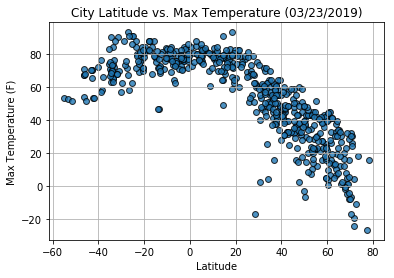

In [5]:
cityFrame.plot(kind ="scatter",x="Lat",y="Max Temp",marker="o", edgecolor="black",grid=True,s=35,alpha=.8)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
date = time.strftime('%m/%d/%Y')
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.savefig("Max_Temp.png",bbox_inches="tight")

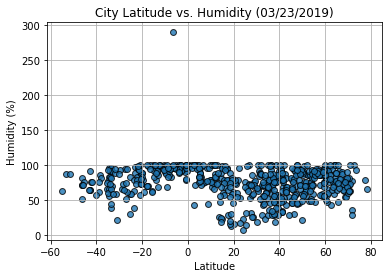

In [6]:
cityFrame.plot(kind ="scatter",x="Lat",y="Humidity",marker="o", edgecolor="black",grid=True,s=35,alpha=.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
date = time.strftime('%m/%d/%Y')
plt.title(f"City Latitude vs. Humidity ({date})")
plt.savefig("Humidity.png",bbox_inches="tight")

#### Latitude vs. Humidity Plot

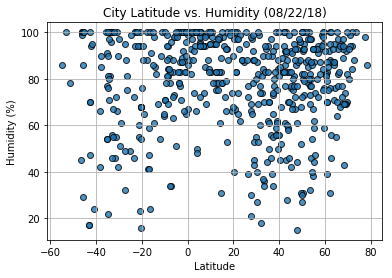

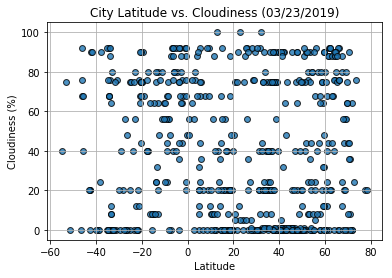

In [7]:
cityFrame.plot(kind ="scatter",x="Lat",y="Cloudiness",marker="o", edgecolor="black",grid=True,s=35,alpha=.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
date = time.strftime('%m/%d/%Y')
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.savefig("Cloudiness.png",bbox_inches="tight")

#### Latitude vs. Cloudiness Plot

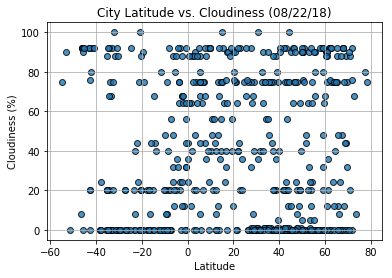

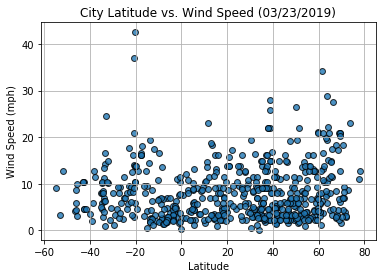

In [8]:
cityFrame.plot(kind ="scatter",x="Lat",y="Wind Speed",marker="o", edgecolor="black",grid=True,s=35,alpha=.8)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
date = time.strftime('%m/%d/%Y')
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.savefig("Wind_Speed.png",bbox_inches="tight")

#### Latitude vs. Wind Speed Plot

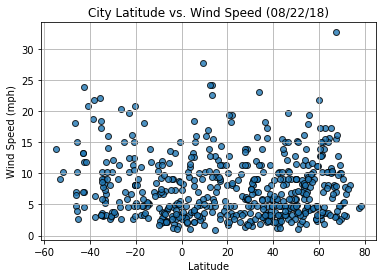